## Essential imports

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# importing custom predefined functions
from functions import *

# Summary notebook 
This notebook contains summarising information about each stage of the project

## Data Sources Evaluation

Source 1 and 5 were both found on the Australian Government data website. Both datasets information were provided by the Australian Taxation office, which we can assume that the information provided is accurate and reliable. The ATO has no reason to publish bias information as it will help the government to make better financial decisions for the country such as knowing how much government allowances and payments are being made which will allow them to distribute funds fairly. Source 1 was last updated on the 27th of October 2020 whilst Source 5 was last updated on the 17th of March 2020 proving its relevance. All information provided on the Australian Government website can be used by the public.

Source 2 was found on Jumpshare.com which is a visual communication platform that combines data. We do not know where the information is provided from which has an impact on the accuracy and reliability. However, by manually checking most of the data we can see that the data is reasonably accurate and able to be used. There is no reason for this data to be bias as it will not have any impact on Australia’s reputation. Source 2 was last updated on the 20th of September 2020 which shows that it is relevant. Jumpshare is a sharing platform so can be used by the public.

Source 3 was found on the New South Wales Government data website. The datasets information was provided by the NSW Department of Customer Service which allows us to assume the information provided is accurate and reliable. The information provided is not biased as it is based on speeding fines issued by fixed digital speed cameras which cannot be rigged. Source 3 was last updated on the 18th of January 2018 which is still relative to our exploration. All information provided by the New South Wales Government data website can be used by the public.

Source 4 was found on the family and community services New South Wales Government data website. The datasets information was processed to meet the Australian Statistical Geography Standard of the Australian Bureau of Statistics (ABS) which allows us to assume the information provided is accurate and reliable. The information is not biased as the rent and sales are fixed and cannot be adjusted in order to meet the standards of the ABS. Source 4 was last updated on the 5th of August 2020 which proves its relevance. All information provided by Government websites in Australia can be used by the public.

*Links provided to source of dataset for replicability.*

- Source 1: https://data.gov.au/data/dataset/taxation-statistics-2017-18 
- Source 2: https://jumpshare.com/v/V8Cu6szjbgAzdcMXWfw9 
- Source 3: https://data.nsw.gov.au/data/dataset/data-on-the-speeding-fines-by-the-offender-s-postcode 
- Source 4: https://www.facs.nsw.gov.au/download?file=786273 
- Source 5: https://data.gov.au/data/dataset/taxation-statistics-2016-17 

## Data Pre-cleaning and basic exploration

In [4]:
#importing data frames, matching their postcode formats and making the postcode into index
income = pd.read_csv('data/Source 1  Australia (based on tax income bracket)/ts18individual25countaveragemedianbypostcode.csv', converters={'Postcode' : '{:0>4}'.format})
income.index = income["Postcode"] 
income = income.drop(["Postcode"], axis = 1)
popul_s = pd.read_excel('data/Source 2 suburb info/Suburbs to Postcodes to Suburbs.xlsx', sheet_name='Postcode Population', index_col = "Postcode",skipfooter = 16,converters={'Postcode': '{:0>4}'.format})

#population_df_h
income.head()

,Number of individuals lodging an income tax return,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Proportion with salary or wages,Count salary or wages,Average salary or wages,Median salary or wages,Proportion with net rent,Count net rent,...,Count total business expenses,Average total business expenses,Median total business expenses,Proportion with net tax,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
Postcode,,,,,,,,,,,,,,,,,,,,,
0800,5168,5168,74990,56363,0.92,4777,76428,59845,0.14,741,...,238,55931,10500,0.87,4475,22583,12806,7324,74077,11624
0810,21449,21449,66197,55311,0.87,18675,67931,59999,0.20,4228,...,1692,58678,12751,0.82,17484,18948,13302,25039,119697,42545
0812,11170,11170,64626,56496,0.88,9797,67487,60989,0.20,2266,...,740,56098,16228,0.83,9226,17661,13313,13262,126783,53552
0820,13186,13186,80947,63161,0.89,11690,77029,65904,0.23,3047,...,871,60852,13101,0.85,11271,25007,15371,15877,143697,46748
0822,6279,6279,48181,36292,0.91,5707,46538,35992,0.10,642,...,255,55751,16282,0.68,4256,13117,7785,9351,49967,10471


In [5]:
#combining imported dataframes together
merged = pd.merge(left= income, right= popul_s, how='left', left_index=True, right_index=True)
merged.head()

,Number of individuals lodging an income tax return,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Proportion with salary or wages,Count salary or wages,Average salary or wages,Median salary or wages,Proportion with net rent,Count net rent,...,Average total business expenses,Median total business expenses,Proportion with net tax,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance,Population
Postcode,,,,,,,,,,,,,,,,,,,,,
0800,5168,5168,74990,56363,0.92,4777,76428,59845,0.14,741,...,55931,10500,0.87,4475,22583,12806,7324,74077,11624,4545
0810,21449,21449,66197,55311,0.87,18675,67931,59999,0.20,4228,...,58678,12751,0.82,17484,18948,13302,25039,119697,42545,29723
0812,11170,11170,64626,56496,0.88,9797,67487,60989,0.20,2266,...,56098,16228,0.83,9226,17661,13313,13262,126783,53552,19315
0820,13186,13186,80947,63161,0.89,11690,77029,65904,0.23,3047,...,60852,13101,0.85,11271,25007,15371,15877,143697,46748,19049
0822,6279,6279,48181,36292,0.91,5707,46538,35992,0.10,642,...,55751,16282,0.68,4256,13117,7785,9351,49967,10471,24111


### Purpose of this pre-exploration
1. To understand the data before cleaning it
    - To examine part of availalbe data and determine ways to clean that data to produce desired outcome
    - To examine and remove finance related attributes that interfere with modeling and analysis
    - to determine what attribute should be predicted
2. To do basic expoloritory analsysis on finance and population related information
    - To explore types of income and their significance
    - To determine the size environment in which wealthy individuals are more likely to be created
    - used to predict wealth based on whether the person has a habuit of submitting tax return)
    
Note: the reason this pre-cleaning section includes some data exploration is because some of that data exploration is needed for data cleaning which comes before the main data exploration and visualisation stage.

### Exploring the data

First, to explore the data, i need to create pairplots and to do that i need to first select 8 most important features that i want to consider and plot them against one another to find possible correlations and trends.

Below are selected features and justification for why they have been chosen:
 - Population - to investigate the impact of population of the coomunity on other factors
 - Average taxable income or loss - to invesitgate how taxable income of individuals correlates with all other factors
 - Average salary or wages - to invesitgate how salary of individuals correlates with all other 
 - Average total business expenses - to invesitgate how amount of business expenses of individuals correlates with all other factors
 - Average net tax
 - Average super total accounts balance
 
I was only able to select 6 relevant parameters, thus those 6 varaibles will be plotted against each other using pairplot to investigate any trends.

In [6]:
# df is not going to be created for pairplot with only relevant columns as outlined above
pairplot = merged[["Population", "Average taxable income or loss", "Average salary or wages","Average total business expenses", "Average net tax", "Average super total accounts balance" ]]

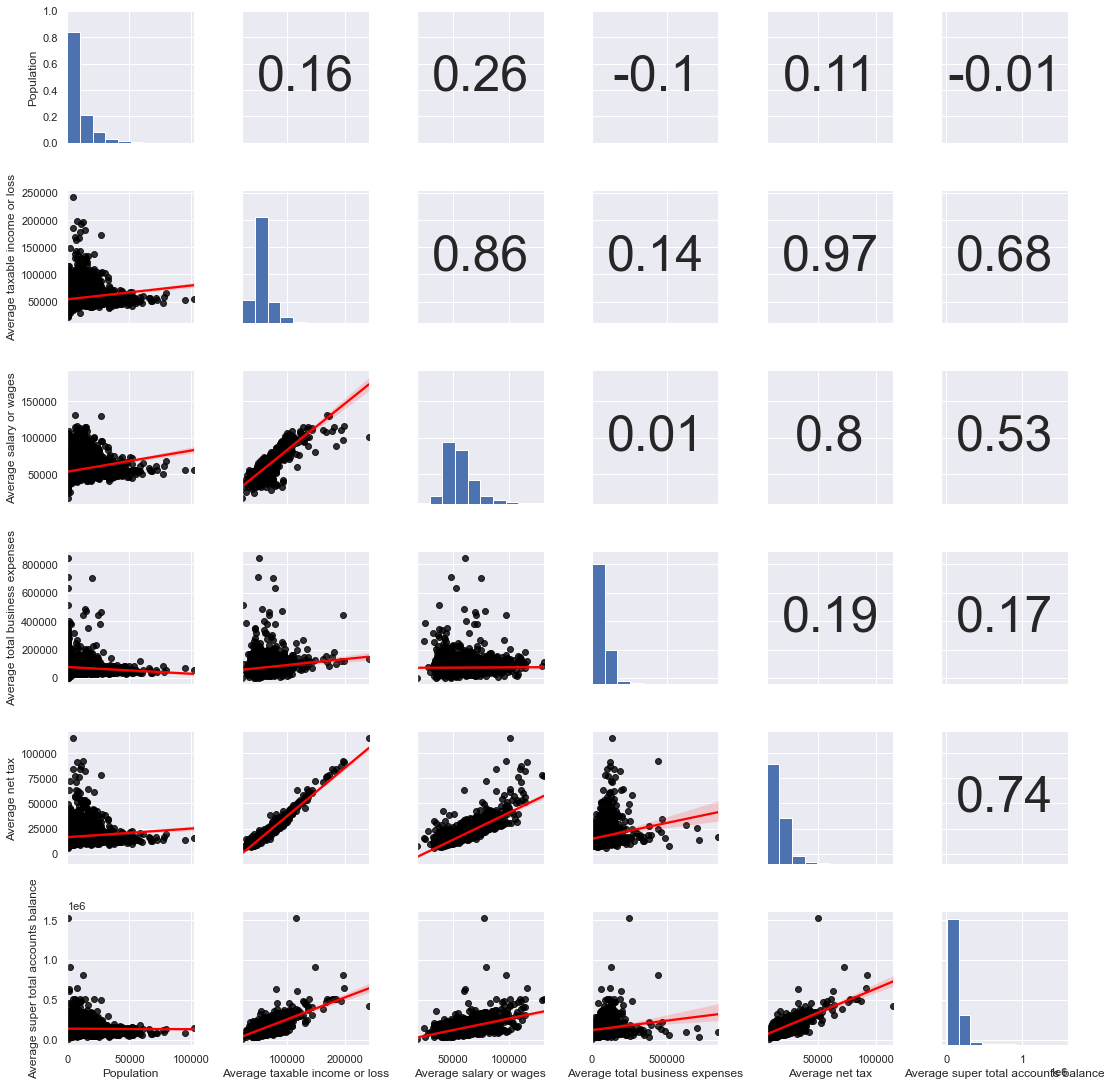

In [7]:
disp_pairGrid(pairplot)

Corr coef rules (this is what is meant when a correlation is called strong, weak or moderate)
- x < 0.4: weak corre
- 0.5 < x < 0.7: moderate corre
- 0.7 < x: strong corre

Observed Interesting Trends & their corr coeffecient ("->" means "implies")
- population -> average salary/wage increases (0.26 cc) weak
- population -> average taxable income or loss (0.16 cc) weak 
- average taxable income or loss -> average super total account balance (0.68 cc) moderate-strong
- average salary or wages -> average super total account balance (0.53cc) moderate

Summing up observations
- Finding one: the balance of super is better for predicting taxable income than it is at predicting salary
- Finding two: population size is better at predicting average salary than it is at predicting taxable income or loss

Note: it is not clear whether those findings are useful and whether they will be used in the final report, yet those findings provide better understanding of data which might be utilised later in the project

### Exploring ways to clean and prepare the data

Point #1: At this stage, it was decided that income should be used as variable to be predicted because income is better representation of weath building activity as it may include things like business income, real estate earning, capital gains as well as salary thus income would be the best metric to measure the growth of weath which is the intention of this project. In other words, **"average taxable income/loss" is _y_ variable**

Point #2: From the above analysis, it it clear that income of the individual is easily predicted using attributes such as "average super account balance", "average net tax" and "average salary or wages". Consdering that this project is focused on investigating financial habits of sucesfull people and the environment in which they strive, using attributes that are at immideate affect of the income and are not related to either finifical habits of the person nor the persons enviroment, those attributes then should be excluded. Reasons for exclusions are outlined below:
   - Average salary: most people rely on wages for majority of their income and thus in most cases, one directly implies another without telling us anything about the habits or environment of the person directly. This atttribute gives us the answer without the telling us much about the actual person and therefore is not useful for the purpose of learning and exploring.
   - Average Super account balance: average sper account balance from what i understand is outside of the immediate control of the person as it is being deposited automatically without any ability for withdrawal. Thus it doesnt tell us anything about the individual other than that individual has high income or high salary which which is not useful.
   - Average net tax: tax paid for majority of people is proportional to the income/salary and is not under direct control of the person. It is common sense that the more person earns, the more taxes are being paid and this revelas nothing about the person nor about that persons environemnt which we are trying to investigate. Those 2 things are highly dependent on each other and in some sense heavily imply each other and for those reasons this attribute will not be considered.
   
In conclusion, those attributes were dropped and will not be considered for modeling because they give away the answer without telling us about bahaviours, habits and the enviroment of the individual which we would like to undersstand to find out what things cause someone to be weathy. With those 3 attributes, the causation is inverted and the high salary is the one that is almost always causing higher taxes paid , higher supper balance  and higher income. Due to those causation issues they are not being considered. lastly, in real world, if we are trying to predict the income, we dont usually have the salary, super and tax paid information avaialble to us and thus using those attributes would be as good as cheating.

## Data Cleaning & Preparation

The original state of data was unsuable. Here are problems that it had and our solutions:
- inconsistent postcode formats which were reformatted by adding "0" padding (converting from varchar to char)
- some numeric values were replaced with "s" and "-" in the original dataset to prevent individual tracing. This was adressed by assigning those values a number based on case.
- data was stored in formatted excel documents with footers, various descriptions, headers and links. Those were adressed by defining dataframe import settings.
- data initially had a plethora of colomns that said very similar thing in different words. Those colomns were removed.
- datasets had varying numbers of postcodes and thus inner joint was used to avoid null values.
- some of the information provided was overly specific and thus was removed to avoid data overfitting
- Certain dataframes had multiple entries for each postcode which needed to be fixed though use of pivot tables and selection of features.
- datasets were unconnected and thus unusuble which was adressed by joining them
- column headings lacked description and their meaning was ambiguous thus renaming on colomns was done.
- values within the dataframe had varying scales and thus standartisation was utilised to adress that.
- some attributes were directly implying the income such as tax paid, super balance and salary data and those had to be removed to allow for fair modelling.
- a new column needed to be added which assigned a class label for each numerical income to allow for probabilitic classification.

Note: a step by step outline of data cleaning process was provided in _Data Cleaning and Prep.ipynb_. The cleaning was difficult and very thorough.

## Data Exploration of Attributes

Under this section, different attributes would be worked upon to figure out if there is an impact on the wealth of the individuals living in New South Wales. 

### First Segment would be based upon the following attributes.
- Medicare Levy 
- Goverment allowances
- Net Tax

In [8]:
df = pd.read_csv("cleanedAndMerged1.csv")
df.head()

,Postcode,Number of individuals lodging an income tax return,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Proportion with salary or wages,Count salary or wages,Average salary or wages,Median salary or wages,Proportion with net rent,...,No. Bedsitter rented,No. Not Specified rented,No. Total rents,Median Weekly Rent for New Bonds\r\n$,Annual change in Median Weekly Rent,Annual change in New Bonds Lodged,New Bonds Lodged\r\nNo.,Total Bonds Held\r\nNo.,sum of speeding fines paid in 2015($),SalesNo
0,2000,23478,23478,73334,29450,0.82,19149,58276,30795,0.13,...,232,530,7595,711.428571,-0.177900,-0.017729,1866,15190,176093,105
1,2007,5032,5032,47170,29967,0.85,4301,49272,33707,0.13,...,20,74,1810,564.857143,-0.009300,0.238571,458,3611,24691,20
2,2008,6305,6305,58973,41681,0.87,5483,57918,45454,0.12,...,605,434,4286,639.000000,-0.094186,-0.091743,941,8572,41985,35
3,2009,9688,9688,86162,53780,0.82,7930,79347,58978,0.18,...,38,134,2793,576.285714,-0.153414,1.504343,857,5589,55523,20
4,2010,20764,20764,89782,59960,0.86,17766,83715,63647,0.15,...,609,757,8079,641.142857,-0.107971,0.290086,1898,16158,112488,151


In [9]:
# Data needed to assist with exploration
Needed_df = df[["Average taxable income or loss", "Average net tax",
                 "Australian government allowances and payments\r\n$",
                 "Medicare levy\r\nno.", "Medicare levy\r\n$"]]
Needed_df.head()

,Average taxable income or loss,Average net tax,Australian government allowances and payments\r\n$,Medicare levy\r\nno.,Medicare levy\r\n$
0,73334,31606,1743683,9629,24540132.04
1,47170,15387,1191725,2416,3637206.66
2,58973,19833,1802427,3633,6984279.64
3,86162,31666,1224571,6218,13916952.11
4,89782,31049,4708267,14492,32520142.07


Questions being explored:
- Does the amount of government allowances being supplied to NSW residents determine how much money they earn?
- Do residents with Medicare tend to be from wealthier areas?
- How does amount of net tax have an impact on wealth?

This segment will be focused on comparing medicare, net tax, government allowances and payments with the wealth of NSW residents. Along with other attributes we will determine which variables have a bigger influence on the wealth of NSW residents living in different postcodes. This will allow us to predict the wealth of NSW residents based on which postcode they come from.

In [10]:
# Choosing specific columns for pairplot
pairplot = df[["Average taxable income or loss", "Average net tax",
                 "Australian government allowances and payments\r\n$",
                 "Medicare levy\r\nno.", "Medicare levy\r\n$"]]

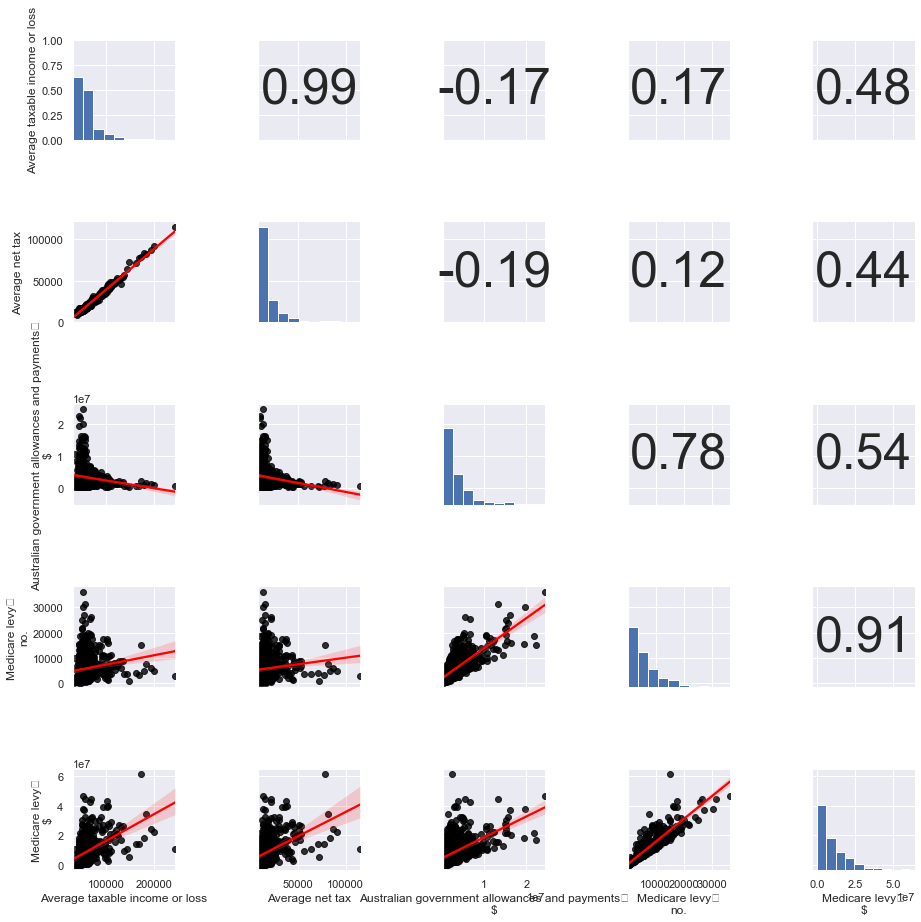

In [11]:
disp_pairGrid(pairplot)

As shown by this pairplot we can visualise the correlation between certain variables which will us to identify the variables that will have an impact on the wealth of NSW residents in each postcode. We determine a strong correlation to be above 0.7, a moderate correlation to be between 0.5 and 0.7, and a weak correlation to be less than 0.5.

### Findings

From this conclusion we have found that:
- Government allowances and payments have a negative weak correlation with average taxable income or loss suggesting than as average taxable income increases, access to government allowances and payments will decrease.
- Medicare levy amount has a positive moderate correlation with average taxable income or loss. This suggests that people with higher income are more likely to have medicare.
- Net tax has a positive strong correlation with average taxable income or loss. Therefore, the postcodes that pay more tax tend to be wealthier.

### Government allowances and payments

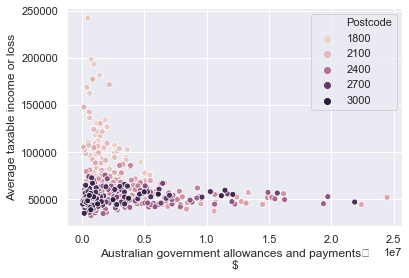

In [12]:
scatter_government = sns.scatterplot(x="Australian government allowances and payments\r\n$", y= "Average taxable income or loss", hue = "Postcode", data = df)

In [13]:
#Government and Income
reg = linear_model.LinearRegression()
X = df[['Australian government allowances and payments\r\n$']]
y = df['Average taxable income or loss']
reg.fit(X, y) #training the model

predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 593928636.8173273
R Squared: 0.02860372281446666


As shown by the scatterplot above we cannot see a linear relationship between government allowances and payments and income. This is further proved by the linear regression model showing an R-squared of 0.0286 suggesting that we cannot predict an individuals income based off government allowances and payments.

### Medicare Levy

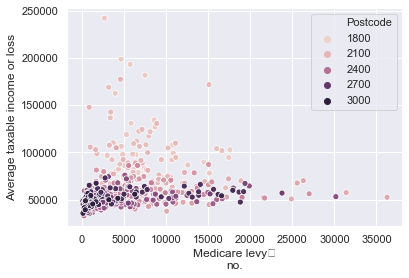

In [14]:
scatter_medicare = sns.scatterplot(x="Medicare levy\r\nno.", y= "Average taxable income or loss", hue = "Postcode", data = df)

In [15]:
#Medicare Levy and Income
reg = linear_model.LinearRegression()
X = df[['Medicare levy\r\nno.']]
y = df['Average taxable income or loss']
reg.fit(X, y) #training the model

predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 594125837.7998804
R Squared: 0.028281191977536535


As shown by the scatterplot above we cannot see a linear relationship between medicare levy and income. This is further proved by the linear regression model showing an R-squared of 0.0283 suggesting that it is highly unlikely that we can predict an individuals income based off medicare levy.

### Net Tax

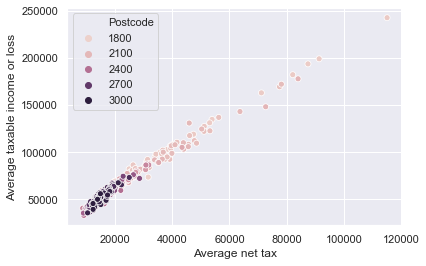

In [16]:
scatter_NetTax = sns.scatterplot(x="Average net tax", y= "Average taxable income or loss", hue = "Postcode", data = df)

In [17]:
#Net Tax and Income
reg = linear_model.LinearRegression()
X = df[['Average net tax']]
y = df['Average taxable income or loss']
reg.fit(X, y) #training the model

predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 12922984.142129734
R Squared: 0.9788638938963075


As shown by the scatterplot we can see a strong positive relationship between net tax and income. This is further proved by the linear regression model showing an R-squared of 0.9789 suggesting that we will have a very accurate prediction on an individuals income based off net tax.

### Evaluation of Attributes
Out of the attributes I have explored, there were no significant correlations between the attributes and average taxable income or loss. Net tax had a strong correlation with average taxable income or loss but we will have to drop net tax for modeling considering it will give away the answer without telling us about bahaviours, habits and the enviroment of the individual which we would like to understand to find out what things cause someone to become wealthy. In conclusion, government allowances and payments, and Medicare has no direct correlation but may still potentially have an impact on an individual's wealth. We will still be using these attributes in our modelling down below.

## Second segment would be based upon the following attributes - 
- Sales No.
- Rent No.
- Speeding Tickets


In [39]:
df = pd.read_csv("cleanedAndMerged1.csv", usecols = ['sum of speeding fines paid in 2015($)','Number of individuals lodging an income tax return','Average total income or loss','No. Total rents','Postcode','SalesNo'], index_col = "Postcode")
df.head()

,Number of individuals lodging an income tax return,Average total income or loss,No. Total rents,sum of speeding fines paid in 2015($),SalesNo
Postcode,,,,,
2000,23478,76497,7595,176093,105
2007,5032,48949,1810,24691,20
2008,6305,71913,4286,41985,35
2009,9688,89627,2793,55523,20
2010,20764,93186,8079,112488,151


In [40]:

#Pair Grid Plot corr calcultions function
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0,1],2)
    ax = plt.gca()
    ax.annotate(pearson,[0.5,0.5], xycoords = "axes fraction", ha = "center", va = "center", fontsize =50 )

In [41]:

# function that plots Pair Grid with data input

def disp_pairGrid(corr_df):
    corr_plot = sns.PairGrid(corr_df)
    corr_plot = corr_plot.map_upper(disp_pearson, color = "lightblue")
    corr_plot = corr_plot.map_diag(plt.hist)
    corr_plot = corr_plot.map_lower(sns.regplot , line_kws = {"color" : "red"}, color = "black")

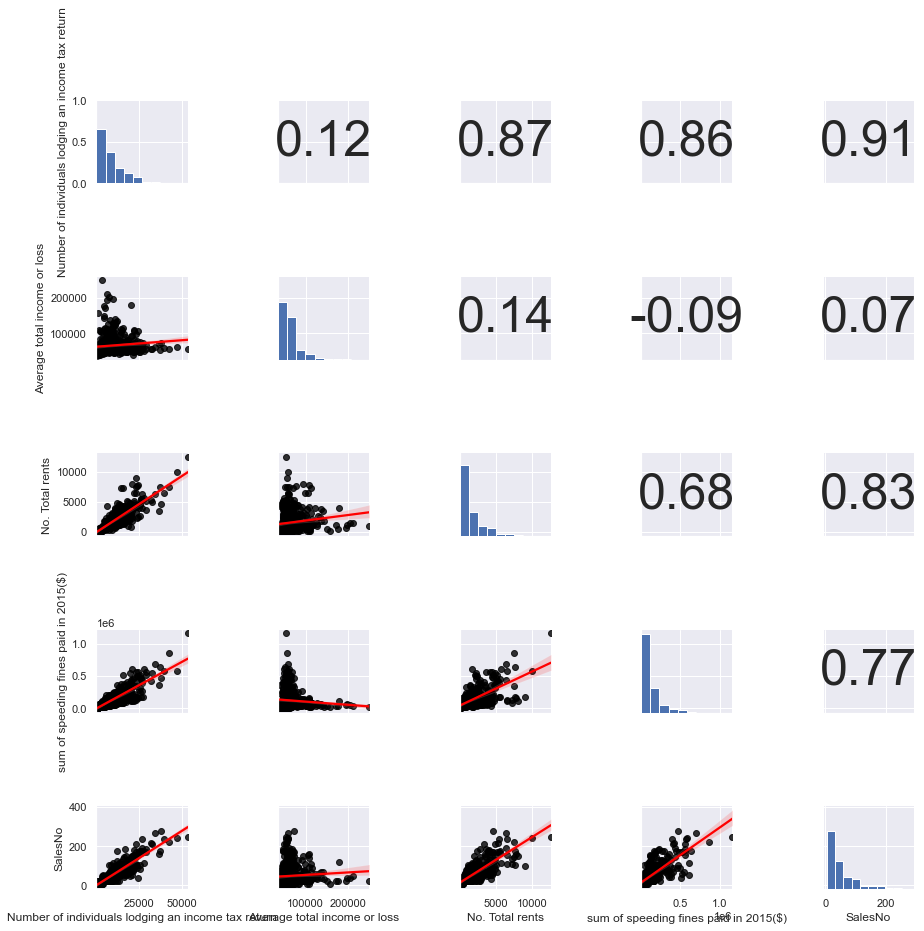

In [42]:
disp_pairGrid(df)

From the pairplot derived above. The graphs relevant to our exploration don't show any significant correlation. Such as Average Total income against No. Total Rent has a correlation of 0.14 and Income against sales No has a mere correlation number of  0.07.


In [43]:
speeding = pd.read_csv("cleanedAndMerged1.csv", usecols = ['sum of speeding fines paid in 2015($)','Average total income or loss','Postcode'], index_col = "Postcode")
speeding.head()

,Average total income or loss,sum of speeding fines paid in 2015($)
Postcode,,
2000,76497,176093
2007,48949,24691
2008,71913,41985
2009,89627,55523
2010,93186,112488


Speeding Ticket is an intresting attribute in such a vigorous research inbetween different sttributes. Speeding tickeet was chosen as a result of curiosity. This is supposed to answer a very minimal yet important question. Is there any correlaion between the risk taking capabilities and the income. We assumed that a person speeding is taking risk discaring the situation he or she might be in. 

In [44]:

#Pair Grid Plot corr calcultions function
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0,1],2)
    ax = plt.gca()
    ax.annotate(pearson,[0.5,0.5], xycoords = "axes fraction", ha = "center", va = "center", fontsize =50 )

In [45]:

# function that plots Pair Grid with data input

def disp_pairGrid(corr_df):
    corr_plot = sns.PairGrid(corr_df)
    corr_plot = corr_plot.map_upper(disp_pearson, color = "lightblue")
    corr_plot = corr_plot.map_diag(plt.hist)
    corr_plot = corr_plot.map_lower(sns.regplot , line_kws = {"color" : "red"}, color = "black")

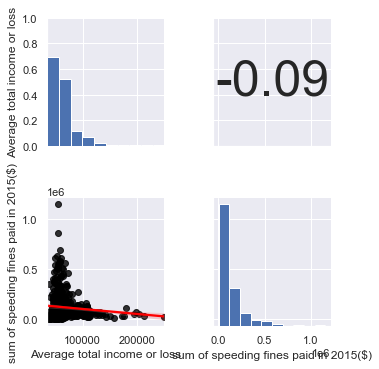

In [46]:
disp_pairGrid(speeding)

There is no significant correlation between high income groups and the number of speedinng tickets in that postcode. 
This concludes to no direct correlation between risk taking of an individual based on the average salary of their postcode and the number of speeding tickets by postcode.
There are more factors involved in risk taking other than financial situation of a particular individual so it is almost imposssinle to derive someone's risk taking capabilities.

## Third Segment would focus upon the following attributes 
- Chanage in value of housing per suburb
- Liquidity of the housing

In [18]:
Full_data = pd.read_csv('cleanedAndMerged1.csv',converters={'Postcode': '{:0>4}'.format})
Full_data.index = Full_data['Postcode']
Full_data

,Postcode,Number of individuals lodging an income tax return,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Proportion with salary or wages,Count salary or wages,Average salary or wages,Median salary or wages,Proportion with net rent,...,No. Bedsitter rented,No. Not Specified rented,No. Total rents,Median Weekly Rent for New Bonds\r\n$,Annual change in Median Weekly Rent,Annual change in New Bonds Lodged,New Bonds Lodged\r\nNo.,Total Bonds Held\r\nNo.,sum of speeding fines paid in 2015($),SalesNo
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,2000,23478,23478,73334,29450,0.82,19149,58276,30795,0.13,...,232,530,7595,711.428571,-0.177900,-0.017729,1866,15190,176093,105
2007,2007,5032,5032,47170,29967,0.85,4301,49272,33707,0.13,...,20,74,1810,564.857143,-0.009300,0.238571,458,3611,24691,20
2008,2008,6305,6305,58973,41681,0.87,5483,57918,45454,0.12,...,605,434,4286,639.000000,-0.094186,-0.091743,941,8572,41985,35
2009,2009,9688,9688,86162,53780,0.82,7930,79347,58978,0.18,...,38,134,2793,576.285714,-0.153414,1.504343,857,5589,55523,20
2010,2010,20764,20764,89782,59960,0.86,17766,83715,63647,0.15,...,609,757,8079,641.142857,-0.107971,0.290086,1898,16158,112488,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2869,714,714,39147,34060,0.64,455,45151,38825,0.11,...,5,5,60,502.000000,0.000000,0.000000,35,132,16548,5
2870,2870,6334,6334,51310,42446,0.79,5014,54826,47790,0.13,...,5,101,974,389.142857,0.008100,0.020129,202,1943,130811,36
2871,2871,4851,4851,49784,41556,0.74,3596,50477,45374,0.13,...,5,20,714,374.571429,0.056414,0.068943,188,1436,116948,35


### Required Data

In [19]:
#this is to compare certain attributes that are relevant to answer the question
needed_data = Full_data[["Average taxable income or loss", "Average salary or wages", "Average net tax", "Annual median salesprice change", "Annual change in sales Count", "SalesNo"  ]]
needed_data

,Average taxable income or loss,Average salary or wages,Average net tax,Annual median salesprice change,Annual change in sales Count,SalesNo
Postcode,,,,,,
2000,73334,58276,31606,0.0524,-0.0278,105
2007,47170,49272,15387,0.1622,0.1765,20
2008,58973,57918,19833,-0.1269,0.6667,35
2009,86162,79347,31666,-0.1034,0.5789,20
2010,89782,83715,31049,0.4222,0.9114,151
...,...,...,...,...,...,...
2869,39147,45151,12347,0.0000,0.0000,5
2870,51310,54826,14272,0.2903,0.0588,36
2871,49784,50477,13901,0.2555,0.2500,35


In [20]:
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0,1],2)
    ax = plt.gca()
    ax.annotate(pearson,[0.5,0.5], xycoords = "axes fraction", ha = "center", va = "center", fontsize =50 )

In [21]:
def disp_pairGrid(corr_df):
    corr_plot = sns.PairGrid(corr_df)
    corr_plot = corr_plot.map_upper(disp_pearson, color = "lightblue")
    corr_plot = corr_plot.map_diag(plt.hist)
    corr_plot = corr_plot.map_lower(sns.regplot , line_kws = {"color" : "red"}, color = "black")

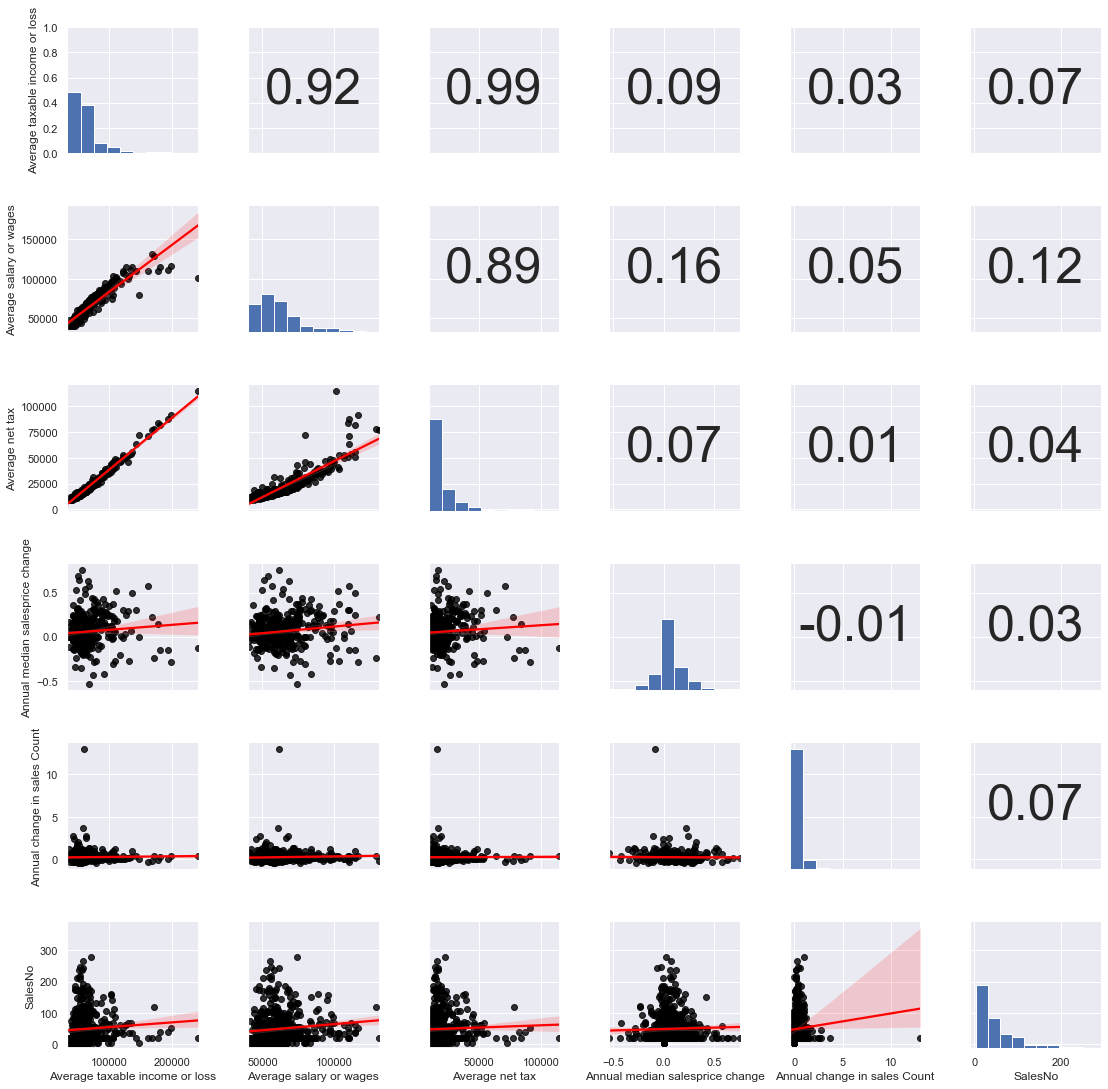

In [22]:
disp_pairGrid(needed_data)

Analysis on pairplot:
From this simple graph showing basic relationships between the attributes of interest ( salesNo, annual medial saleprice change and anual change in sales count) we can see that there is not really any strong relationships. this suggest that we wont find any conclusive correlations to attempt to predict where and why wealtheir people are living in specific postcodes. 

although, there are some weak relations, exploring these further may help actually provide helpful to discover further relationships and posibly lead to new predictions.

## SalesNo exploration

for this section i will explore the attribute of salesNO ( how many houses have been sold in a specific postcode over the past year). whether or not the weak relationships discovered above could be useful as well as what knowledge we can take from the results.

First, it seems there is a slight relationship with the average income and salesNo, if so very helpful for us to predict wealth based off postcode. to test this i will see the strength of the relationship with a linear regression model, then explore further if results suggest.

In [23]:
reg = linear_model.LinearRegression()
X = needed_data[['SalesNo']]
y = needed_data['Average taxable income or loss']
reg.fit(X, y)

LinearRegression()

In [24]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 608055471.3232734
R Squared: 0.005498666757516646


In [25]:
train, test = train_test_split(needed_data, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(409, 6)
(103, 6)


In [26]:
reg = linear_model.LinearRegression()
X_train = train[['SalesNo']]
y_train = train['Average taxable income or loss']
X_test = test[['SalesNo']]
y_test = test['Average taxable income or loss']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [34.88040919] + 60399.089969311775


In [27]:
predicted = reg.predict(X_test)
mean_squared_error(y_test,predicted), r2_score(y_test,predicted)

(672960393.7219356, 0.006875370047901175)

Conclusion:

As the score has come out at 0.0069, the possibility to predict someones income based off of the sales in an area is pretty much impossible to be accurate. this makes logical sense, though there did seem to be a relation in the pairplot. as the result has come out so clearly poor, there is no real need to go further into this attribute trying to find a relationship with it and our main attribute of income, which is our target question.

## change in sales count

the next attribute that could potentially be used to make predictions and answer the target question is the changes in sales count. is it possible to predict someones income based on the change in sales count in a postcode? this could work by having a relationship directly with the income attribute or having a correlation with changes in sales price, which would then need to have a strong relation with income.

based off of previous graphs and conclusions i do not think there will be strong enough correlations to get a conclusion from this. bus none the less it is still neccessary to explore in case there is a correlation.

In [28]:
reg = linear_model.LinearRegression()
X = needed_data[['Average taxable income or loss']]
y = needed_data['Annual change in sales Count']
reg.fit(X, y)

LinearRegression()

In [29]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.5100927352513505
R Squared: 0.0006331526179131908


In [30]:
reg = linear_model.LinearRegression()
X_train = train[['Average taxable income or loss']]
y_train = train['Annual change in sales Count']
X_test = test[['Average taxable income or loss']]
y_test = test['Annual change in sales Count']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [2.55939275e-07] + 0.23361588977554318


In [31]:
predicted = reg.predict(X_test)
mean_squared_error(y_test,predicted), r2_score(y_test,predicted)

(1.850342838197304, -0.008217904149643962)

conclusion:
similar to the last attribute SalesNo, there is no apparent relation with the attribute of income which is what we are attempting to predict. looking at the plots these 2 variable are most likely to have some sort of correlation though there is nothing.

## Scatter Plots

as there is clearly no relationships with income and sales data or changes in medians in sales, i will try to find further relationships adding scatterplots to further graph the attributes in an attempt to find new relationships with more data.

In [32]:
scatter_data = Full_data[["Postcode","Mean Sales Price","Average taxable income or loss", "Average salary or wages", "Average net tax", "Annual median salesprice change", "Annual change in sales Count", "SalesNo"  ]]
scatter_data

,Postcode,Mean Sales Price,Average taxable income or loss,Average salary or wages,Average net tax,Annual median salesprice change,Annual change in sales Count,SalesNo
Postcode,,,,,,,,
2000,2000,1541,73334,58276,31606,0.0524,-0.0278,105
2007,2007,834,47170,49272,15387,0.1622,0.1765,20
2008,2008,956,58973,57918,19833,-0.1269,0.6667,35
2009,2009,1277,86162,79347,31666,-0.1034,0.5789,20
2010,2010,1357,89782,83715,31049,0.4222,0.9114,151
...,...,...,...,...,...,...,...,...
2869,2869,910,39147,45151,12347,0.0000,0.0000,5
2870,2870,348,51310,54826,14272,0.2903,0.0588,36
2871,2871,304,49784,50477,13901,0.2555,0.2500,35


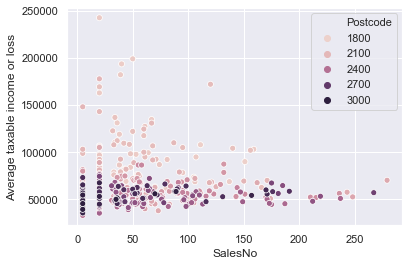

In [34]:
scatter = sns.scatterplot(x="SalesNo", y= "Average taxable income or loss", hue = "Postcode", data=scatter_data)

this was the attribute combiniation i thought would most likely have some sort of relation, although i have already tried to run some regression models on these attributes and there is no solid correlation within the datasets used. despite the graph presenting what looks to be a relationship.

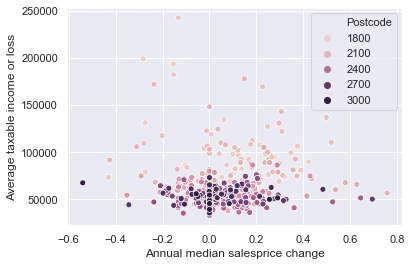

In [35]:
scatter = sns.scatterplot(x="Annual median salesprice change", y= "Average taxable income or loss", hue = "Postcode", data=scatter_data)

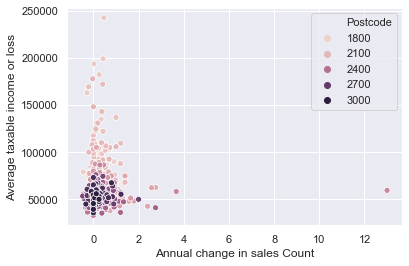

In [36]:
scatter = sns.scatterplot(x="Annual change in sales Count", y= "Average taxable income or loss", hue = "Postcode", data=scatter_data)

The Data and attributes that i have attmepted to explore do not have any significant findings that can be related or useful to answer our target question. this data could be useful to determine other areas of interest such as how the change in the market values affect the count in sales or questions of similar nature but cannot assist us in trying to determine someones income based off of their postcode. 

to do this i would be required to relate an attribute or 2 to someones income, which is clearly not possible with the exploration i have completed.

## Introduction to modeling
At this point, we aim to achieve 2 things:
1. To build a predictive model that estimates the income of an average individual living in a particular suburb. This aims to give an individual tangible feedback about how much income an individual is likely to make annually based on characteristics of the suburb.
2. To build a predictive model that classifies how likely the person is to be wealthy based on characteristics of the suburb

Note: this is modeling part 1 and only covers regression models and corresponds to the dot point #1 above. This is no longer a discovery stage and thus data was normalised and prepared to improve results of modeling.

Modeling Procedure
- Given that we only have around 500 datapoints, we can not afford to do train/test/validation split as that will not leave us a lot of training data. A solution to this is to split the data into train and test and use cross validation on the training data to find optimal hyper parameters. Then, test data will be predicted based on that optimised model to evaluate models generalised performance.
- For cross validation, k value of 5 was chosen because we have very limited data and we would like to keep each k-fold representative of the total sample. If we were to take higher k parameter than each fold might be too small to be representative of the total.
- Due to limited data being avilalble we have chosen to only use 20% of the data for testing because we want to maximise the size of our training set while still obtaining a reasonable evaluation of our models. The 80/20 ration seemed like a good balance.

Note: For this part of report, the amount of code was greatly minmised to allow for better reading experience. This came with a cost and now graphs and result tables are clustered together and evaluation for each graph and result tables are clustered together too. In other words all findings for a particular model are grouped and all justifications for those finings are grouped too. Therefore a journal aricle presentation style was adopted.

## Modeling Part 1

### Train/Test Split 

In [16]:
X = pd.read_csv("df_X.csv", index_col = "Postcode")
y = pd.read_csv("df_y_reg.csv",index_col = "Postcode")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=.2, random_state=42)
print("shape of values:")
print("X_train: "+ str(X_train.shape) + "| X_test "+ str(X_test.shape) + "| y_train "+  str(y_train.shape) + "| y_test " + str(y_test.shape))

shape of values:
X_train: (409, 57)| X_test (103, 57)| y_train (409, 1)| y_test (103, 1)


### Distribution of Train/Test Split

Now, lets look how similar distributions of y values are on training and test sets to verify that distrbutions are simmilar and thus our evaluation of the model could be trusted.

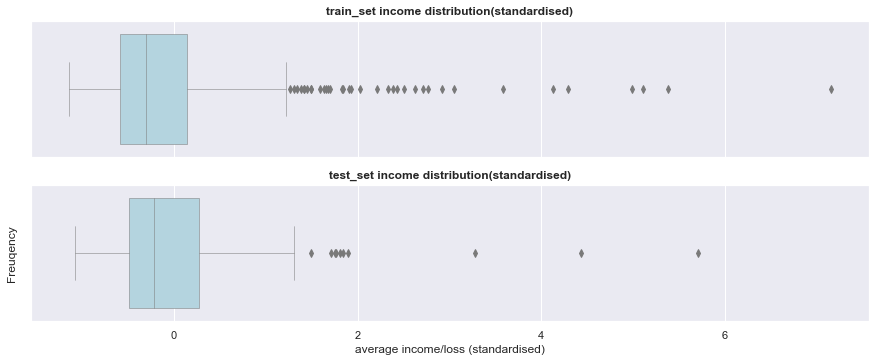

In [18]:
compare_distributions(y_train, y_test)

As can be observed above, both sets seem to be slighly different. The train boxplot has lower min, median and max points and thus, the test set might not be very precise at estimating the accuracy of our trained model. Yet, because the difference between 2 distributions doesnt seem that significant, we decide to go with this train/test split in order to maximise the size of our learning set.

### Linear Regression model



Total number of features :  57
Optimal Number of Features :  50
Best features ranked :  Index(['Number of individuals lodging an income tax return',
       'Count taxable income or loss', 'Proportion with salary or wages',
       'Count salary or wages', 'Proportion with net rent', 'Count net rent',
       'Median net rent', 'Count total income or loss',
       'Count total deductions', 'Average total deductions',
       'Median total deductions', 'Proportion with total business income',
       'Count total business income', 'Average total business income',
       'Median total business income',
       'Proportion with total business expenses',
       'Count total business expenses', 'Average total business expenses',
       'Median total business expenses', 'Proportion with net tax',
       'Count net tax', 'Count super total accounts balance', 'Population',
       'Number of individuals\r\nno.', 'Taxable income or loss3\r\nno.',
       'Taxable income or loss3\r\n$', 'Tax on taxabl

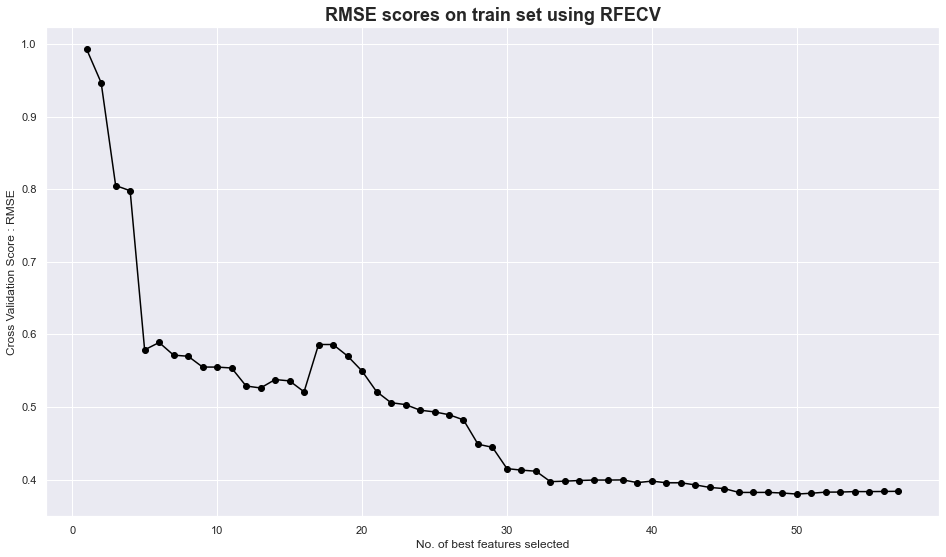

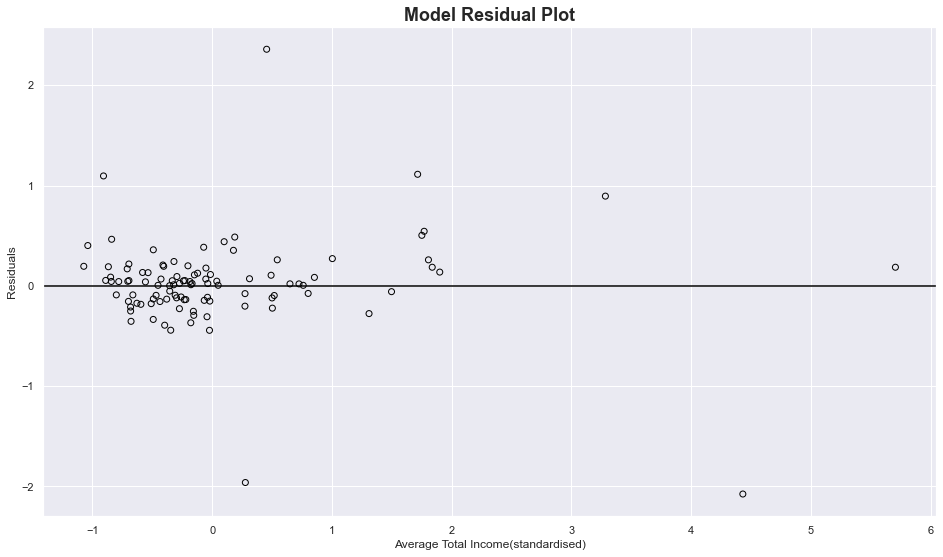

In [19]:
RFECV_LR(X_train,y_train, X_test, y_test)

**General points** : Charts and other finings above show the performance of the model when features had been optimally selected and considering that linear regression doesnt have any hyperparameters that could significantly improve our finings, above is the final perforamnce of linear regression model. Below is the analysis of this models performance.

**Result table evaluation** : As can be seen from the regression model result evaluation above, the overfitting is quite large as all results of training data are somewhat better than results of test data which could mean that the model is either not very well generalised or there are noticable random train/test split variations. Given that our dataset is quite small, our overfitting can be likely be justified with random train/test split variatiation which we already attempted to optimised. To reduce the overfitting, we could try to increase the size of our training set yet thats out of the scope of this project as our current prediction is good enough.

**Model residual Plot evaluation** : The majority of points are laying close to the 0 residual line with majority of points being between -0.5 and 0.5 residuals. There seems to be a mild trend that shows that datapoints with higher incomes are more likely to be further from 0. This seems to be a trend because the proption of datapoints that are far from 0 is lower when the income is around 0 and higher when income of around 1.7 standardsised. 
the justification for such trend could be that the dataset had a lot less datapoints which corresponded with higher incomes and thus the model is overfitting to the magority of datapoints with average income. There is not much we can do with linear model to improve this as linear model is too simple to capture those differences between incomes. consisdering the slighlty uneven distribution of residuals, it might be possible that a more complex non-linear model could model this realtionship more effectively.

**RMSE Scores using RFECV plot evaluation** : As can be observed from analysis above, The accuracy of the model is maximised at around 50 features, yet, the performance of the model doesnt seem to be be significantly impacted when more than 46 features are used and the impact of additional features seems to be negligable. Thus, if for some reason we had a restricted number of features we could select, selecting 46 features for this model wouldnt be a bad choice, yet considering that we dont have such limit, we can use the optimal number.

### Decission Tree model (with optimised hyper-parameters)

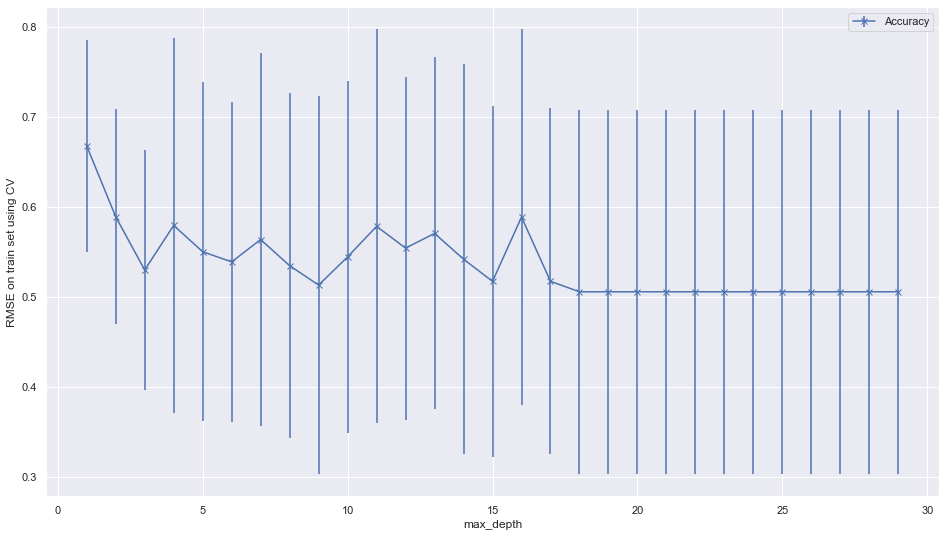

In [20]:
tree_tuning(X_train,y_train)

**Tree tuning comments** : According to reasearch, most hyperparameters of trees do not result in significant change in performance of decission tree models especially parameters like gini and entropy which result in extremely similar performance. Thus, it was decided that the only hyperparameter to be selected is max_depth of the tree. By default, decission trees keep splitting branches and thus increasing depth until the total purity is reached. This default aproach is not effective because it leads to overfitting and inferior performance, thus to generalise the model, this hyper-parrameter was tuned.

To find best hyperparameters for this model, a cross validation search was done on the trainning set for each max_depth level. Conclusions from the above diagram go as follow:
- The difference between all k-fold splits is significant which is indicated by error bars and thus it is clear that the performance of the model is highly dependent on the split of that model
- Error bars are likely so large because each k-fold split was too small to be representative of the total sample. In theory this could be fixed by having a larger dataset which is not possible because NSW has limited number of suburbs and thus we have to do our best best the dataset given.
- We can find lowest RMSE scores on the graph when the hyperparameter value is either 9 or more than 18. Those 2 numbers were selected based on the mean of scores represented by trend line and to lesser extend; certainty of that result which is indicated using the error bar. Given that when building tree models, we would like to avoid having too many branches as was discussed previously, in order to avoid overfitting. Given that after the hyperparameter surpasses the max_depth of 18 mark, the performance stays constant, that is likely to be indicative of the fact that the total purity is reached and thus we would like to avoid those hyper parameters. So the only option that is left for hyperparameters is 9 and thus the hyper parameter of 9 will be used.
- Considering that error bars are large, we can only speculate that the best hyper parameter is 9 and this could hypotehtically change if we had more data being avialble, yet with the amount of data that we have, this is our best guess.

So now, once we have made an educated guess about our optimal hyper parameter value. Lets see how well our optimised model performs on the test data by predicting y_test given X_test. To do that we have to create the same training model again with chosen hyperparameter because the best model can not be extracted from the previous piece of code.

In [21]:
model_build(X_train, y_train, X_test, y_test, DecisionTreeRegressor(random_state=42, max_depth = 9), "tree")

Training data
RMSE:  0.05 | R2:  1.0 | MAE 0.03 | MAPE 1120.94

Testing data
RMSE:  0.35 | R2:  0.89 | MAE 0.24 | MAPE 391.98

% difference between train and test
RMSE:  85.0 | R2:  11.02 | MAE 87.0 | MAPE -186.0


Below is a comparision between results of testing set evaluation on linear regression and decission tree
- Linear Regression : RMSE 0.46 
- Decission tree :    RMSE 0.35 (better score)
   
- Linear Regression : R2 0.8
- Decission tree :    R2 0.89 (better score)
   
- Linear Regression : MAE 0.25
- Decission tree :     MAE 0.24 (better score)
   
- Linear Regression : MAPE 109 (better score)
- Decission tree :    MAPE 391 

**Evaluation of results** : All our performance indicators are noticably better for decission tree except for MAPE score. On the other hand our MAPE score is better for Linear Regression, yet MAPE score is not a very reliable indicated for our project because our data was originally standardised into a distribution with mean of zero, that means many of our values are extremely small and very close to 0. Given that to calculate MAPE scores we must use division operation to scale everything by the actual value, MAPE score becomes undefined for data points where the value is 0 and MAPE scores grow very large when actual values are very small, thus such score is not a reliable indicator of performance for this project and thus will not be used. Consdering that all other performance indicators are giving us a better score for decission tree, we will choose decission tree over linear regression for oir regression modeling.

### Other regression models evaluation

- GussainNB can not be used on this data as it is classifier and thus all items within dataframe have to be integers which we dont have as our data is standardasied and most of the data is in decimal places. It would be incorrect to round that data to a decimal place to fit this model because majority of data will be lost in case of rounding and we would like to avoid that if we want to improve the performance of our model
- Neural network model was not used because of 2 factors:
    - Neural netowrks are not ideal of regression 
    - Neural netowrks require a lot of data to be effective and we only have less than a thousand data points. Thus neural netowrk would be a poor choice for current problem at hand 
- KNN model was not considered due to time limitation on the project. Implimenting KNN would be an idea for the next time. Yet, i project KNN model to perform the best because it can create more complex models than linear regression and decission trees.

### Modeling Part 1 summary

Ultimately, our goal with regression modeling is to give individual a rough estimate of how much they are expected to be making depening on characteristics of their suburb. According to our analysis and evaluation, Decission tree model is a better model for this purpose due to its superior scores. On the other hand regression model was rejected due to its inferior scores while GussainNB and Neural netowrks were rejected because of their unsuitability to this project and to our data.  Now, once the model has been built, lets create a more important model which is to estimate the likelyhood of person becoming rich in their current suburb which you can find in Modeling Part 2. 

## Modeling Part 2
this part of the modeling aims to assign a probability given characteristics of suburb, that a person living in a that suburb is wealthy. In this modeling stage, we are predicting categorical values which means that we can use stratify parameter for our train/test split. This will ensure that our testing set more robustly reflects the performance of the model. Other than this, we are using very similar train/test split proceddure as in Part 1 for exact same reasons.

In [22]:
y = pd.read_csv("df_y_cat.csv", index_col = "Postcode")

In [23]:
# data split #1 
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=.2, random_state=42, stratify = y)
print("shape of values:")
print("X_train: "+ str(X_train.shape) + "| X_test "+ str(X_test.shape) + "| y_train "+  str(y_train.shape) + "| y_test " + str(y_test.shape))

shape of values:
X_train: (409, 57)| X_test (103, 57)| y_train (409, 1)| y_test (103, 1)


### Logistic Regression

Our first model is Logistic regression which utilises recursive Feature Elimination using Cross validation to ensure optimal parameters and number of parameters are chosen.

Testing accuracy:   0.971
Training accuracy:   0.983


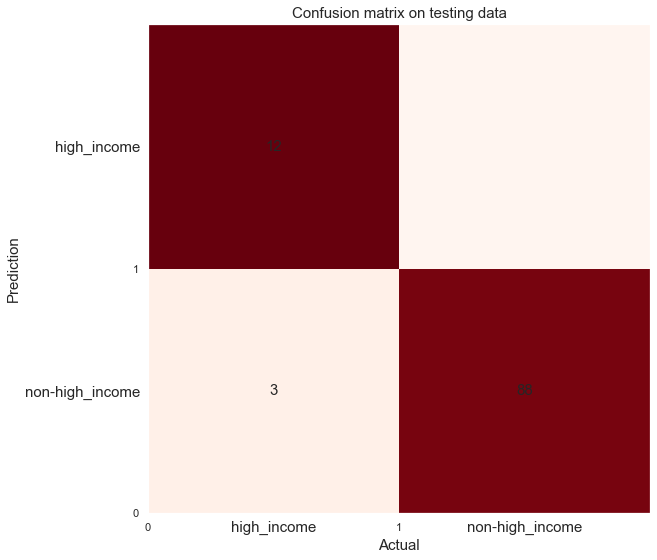


Parameter Tuning info
Total number of features :  57
Optimal Number of Features :  28

Best features ranked :  Index(['Number of individuals lodging an income tax return',
       'Count taxable income or loss', 'Count salary or wages',
       'Proportion with net rent', 'Count net rent',
       'Count total income or loss', 'Count total deductions',
       'Average total deductions', 'Count total business income',
       'Average total business income', 'Average total business expenses',
       'Median total business expenses', 'Proportion with net tax',
       'Count super total accounts balance', 'Population',
       'Number of individuals\r\nno.', 'Taxable income or loss3\r\nno.',
       'Taxable income or loss3\r\n$', 'Tax on taxable income\r\nno.',
       'Tax on taxable income\r\n$', 'Medicare levy\r\n$',
       'Total Medicare levy liability\r\n$', 'Net tax\r\n$',
       'Mean Sales Price\r\n$'000s', 'Annual change in sales Count',
       'No. 4 or more Bedrooms rented', 'No. B

In [24]:
RFECV_cat(X_train,y_train, X_test, y_test, LogisticRegression())

Here are observations that are based on the above graphs and result finings:
- As can be observed above, the perfrmance of the feature selected Logistic regression model has slight overfitting to the train data, yet the performance is overall very good, so this slight overfit can be neglected.
- It can be seen that the optimal number of best features to be used is around 28 out of 57 total features.
- The model is better at predicting non-high income households which makes sense because we have around 4 times more non-high income household labels than high-income labels as determined during preparation stage. So a remedy for this would be to have a lot more data with high_income labels which is impossible to get as discussed previously. Thus, thre is no easy way to improve the performance of this model further.

Now, once the model is optimised, lets set up this model in a way that when parameters are inputted, the probability of high_income label is returned. The way this can be set up is by calling _LogisticRegression.predict_proba(data)_ function which will return probabilities that given the parameters of the postcode, the average individual within that postcode will belong to all labels. Returned probabilities will be in order mirroring the order of self.classes_ call. Considering that our goal is to find the probability of individual being high income only, we need to remove the unnecessary information and call _logistic_model.predict_proba(data)[:,0]_ which in theory should slice the returned array with 2 columns and only keep the first column which would represent the high_income class. This probabilistic output would give an individual some data about how likely it is that the person will have high_income status when considering characteristics of the postcode. This model has high accuracy and it is based on probability which makes it ideal for given scenario. Although it is very curtain that this model will be selected for categorical modeling, lets develop other models that can be used for verification of our findings. To maximise our verification capability, lets choose a model that is not based on probability. KNN was chosen due to its simplicity.

### KNN

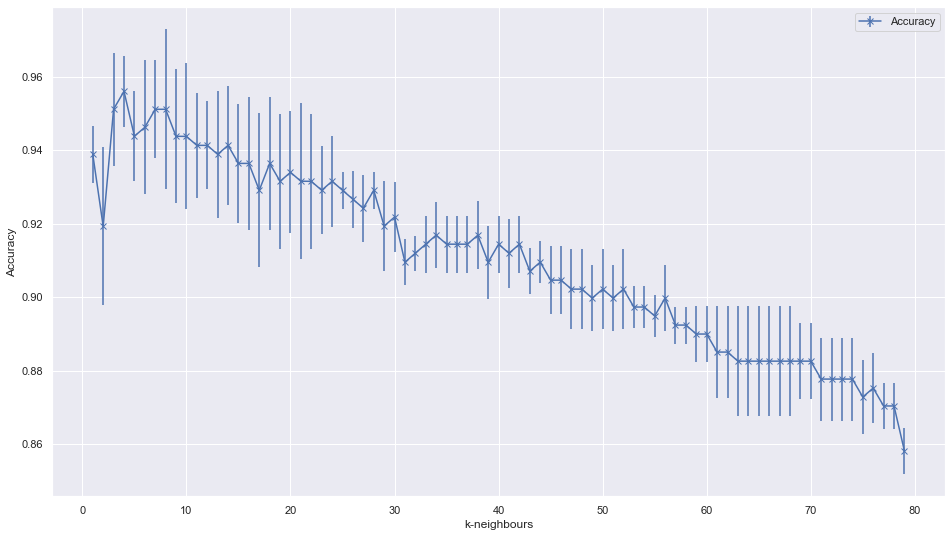

In [25]:
inputRange = range(1,80,1)
parameterTuning_CV_KNN(X_train, y_train,inputRange)

As can be seen ffrom the CV graph above, results of different sample splits, have some deviation in performance. This means that choosing the optimal hyperparameter from this diagram can not be done with high certainty as there is some room for error due to variation in sample splits. It is important to note that to minise that error, statisfied train/test split and StratifiedKFold cross validation were used to keep that error low and managable. In regards to best hyper parameter value, it can be concluded that 4 k-neighbours should result in the best accuracy of the final model due to the shape of the trend line.

Lets now see how this model with hyperparameter 4 generalises on to the testing set.

Note: to clarify again, another model is created below using train data simply because the model above was not returned by the above function as i needed to make the hypererparameter judgment based on a graph before i knew which hyperparameter needed to be selected.

Testing accuracy:   0.942
Training accuracy:   0.963


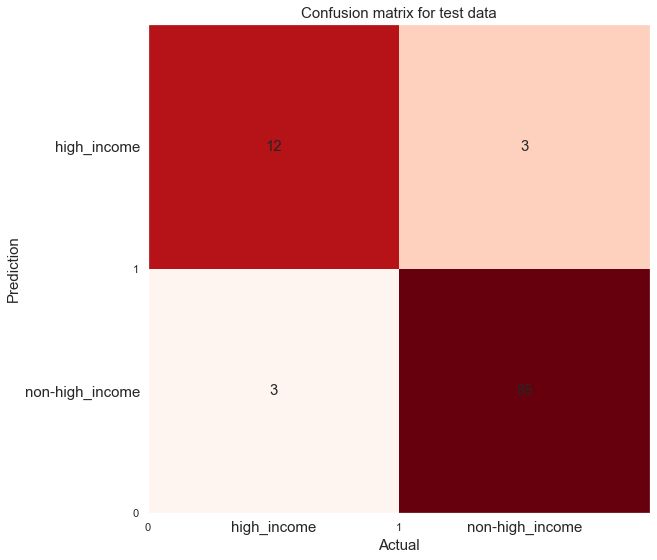

In [26]:
class_model_build(X_train, y_train, X_test, y_test, KNeighborsClassifier(n_neighbors = 4))

Observations about the above model are listed below:
- this model seems to overfit more than logistic regression model
- this model is equally as good at predicting high income label yet, it is worse at precting non-high income label when compared to logistic regression.

Overall, the accuracy of 0.942 is not horrible and it could be used to confirm and verify findings of Logistic Regression model before providing the user output. To make this even better, we can automate this process to only verify the output of logistic regression if the label provided is high_income and not non-high income because the logistic regression is already excellent at predicting non_high income and no further verification is needed on that label.

### Modeling Part 2 summary

It is clear that Logistic regression model provides far superior performance over the KNN model with their according accuracy scores being 94.2% and 97.1% which indicate that the model is accurate in n% of cases. Although one model is superior due to its accuracy, we can use both models at the same time to:
1. calculate the probability of individual being labeled as high_income using logistic regression model
2. verify our findings using KNN model

The reason KNN model would be excelent for verification is because both models are built on different theories where KNN is based on distance measurements such as euclidean distance and Logistic regression is based on probability. By having 2 different aproaches trying to predict the label, we will be able to verify and confirm our findings because it is unlikely that 2 completely different models will give incorrect prediction at the same time. Thus Logistic Regression will be used to calculate the probability and KNN will be used for verification of results. For example, this can be done in the following way; If we are given a probability of 0.6(over-half chance) that a person should belong to high income and KNN model predicts that that person should be given high income label, then our findings are verified. 

Due to limited time frame, i didnt get to model neural networks, decission trees for classification and Naive bayes. This could be an implimentation idea for next time. Although, Naive Bayes could be of significant usefulness to this project as it is aprobabilitic model and my guess is that it could potentially be used for predicting and outputing probabilities that row belongs to a certain class.

## Combined Modeling Summary

To obtain our highly performing models following tools were utilised:
- Hyperparameter tuning: Was used to maximise the performance of the model. This was done through manual implimentation of for loop to iterate through certain domain of hyperparameters and record their cross validation performance scores for each one. This implimentation was extremely similar to grid search and was all scores were plotted to determine the best hyper parameter.
- Recursive feature elimination was used for linear and logistic regression models to choose optimal number of best features and thus maximise performance. 
- Cross validation was used to improve the robustness of data training and to allow for more data to be used for training by removing the need to have a validation set as well.
- StraifiedKFold and stratified sampling were used on categorical models to ensure even distributions of labels in each of the set splits.
- evaluation techniques such as; RMSE, R2, MAE, MAPE, Accuracy Score, Confusion Matrix
- models such as; Linear Regression and Decission trees for regression and KNN and logistic Regression for classification.

Although the modeling stage was conducted thoroughly, there are some ways this could be improved, yet those improvements are out of the scope of this project due to time limitation. Ways to improve modelling:
- Additionally utilise F-score and AUC for categorical model evaluation to allow for additional evaluatory indicators which could tell us something new about data.
- T-test scores should be conducted on results of all models to compare whether evaluation scores of 2 models have statistically significant difference between them with a significance threshold of 0.05
- To ensure a more robust evaluation of models and improve the qulity of analysis, we would want to repeat the modeling stage 4-5 times while trying different random data splits and then finding the mean from results of all splits in order to reduce the potential error associated with random variations in distributions during data splits.
- Adding to the last point, we could repeat the cross validation on our training set multiple times and calculate the mean of all evaluations in order to ensure that the error caused by random partitionings that occur during cross validation is minised.

## Summary 

- Before concluding our Project I would like provide a summary which can help in better understanding the idea behind this project.
- The Project Idea or the question selected was a clever way of depicting the mindsets involved in this Project. 
 - Predicting someone’s wealth based of their attributes.
- Appropriate Datasets from reliable sources were brought together for collecting all the attributes.
- Attributes were specifically selected from a huge collection of dataset points. For an accurate conclusion. Attributes such as speeding were there to find any trends which might tell us something about the similarities in the mindset of some people. 
- Models were selected based of their performance and reliability. 


## Conclusion

- After rigorous Exploration into our segregated datasets, we came to a conclusion that there is no fool proof way to estimate someone’s income based of their individual attributes. Since the correlation was so weak that it didn’t have any impact on the main question by themselves.
- Our assigned attributes after the shortlisting the raw data were  – Tax, Sales, Rent, Speeding, Medicare Levy, Government allowance sand Liquidity in house sales.  Since these were the key attributes from the raw data. 
- The three different segments talk about different attributes in detail. 
- Despite our anticipation for the conclusion, we trained our models with dataset and came to a different conclusion. Our models were able to predict the wealth of an individual very accurately. 
- Different attributes when featured in our models played a crucial role and the weak correlations combined were enough to predict an outcome. 